In [40]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

df_train = pd.read_csv("../data/preprocessed/df_train001.csv")
df = pd.read_csv("../data/preprocessed/df.csv")

---

In [41]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6


In [42]:
df_train['년'] = np.float64(df_train['일시'].str.split('-', expand=True)[0])
df_train['월'] = np.float64(df_train['일시'].str.split('-', expand=True)[1])
df_train['일'] = np.float64(df_train['일시'].str.split('-', expand=True)[2])

In [43]:
df['년'] = np.float64(df['일시'].str.split('-', expand=True)[0])
df['월'] = np.float64(df['일시'].str.split('-', expand=True)[1])
df['일'] = np.float64(df['일시'].str.split('-', expand=True)[2])

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X = df_train.drop(columns=['일시','평균기온'], axis=1)
y = df_train['평균기온']

In [47]:
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.5, random_state=42 )

---

In [48]:
df_train = df_train.drop(columns='일시')

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [52]:
# LSTM에 사용할 데이터 생성
X_L = []
y_L = []

for i in range(len(df_train)-10):  # 예측을 위해 마지막 10개 데이터는 제외
    X_L.append(X[i:i+10])
    y_L.append(y.iloc[i+10])  # Stock1_Price를 예측

X_L, y_L = np.array(X_L), np.array(y_L)

In [54]:
X_L.shape

(23001, 10, 12)

In [56]:
y_L.shape

(23001,)

In [57]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_L.shape[1], X_L.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

In [60]:
# 모델 훈련
model.fit(X_L, y_L, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
719/719 [==============================] - 5s 5ms/step - loss: 25.1360
Epoch 2/50
719/719 [==============================] - 5s 7ms/step - loss: 4.8799
Epoch 3/50
719/719 [==============================] - 5s 6ms/step - loss: 4.3414
Epoch 4/50
719/719 [==============================] - 5s 7ms/step - loss: 4.1696
Epoch 5/50
719/719 [==============================] - 5s 6ms/step - loss: 4.1062
Epoch 6/50
719/719 [==============================] - 5s 6ms/step - loss: 3.9699
Epoch 7/50
719/719 [==============================] - 5s 6ms/step - loss: 3.9600
Epoch 8/50
719/719 [==============================] - 5s 7ms/step - loss: 3.8919
Epoch 9/50
719/719 [==============================] - 5s 7ms/step - loss: 3.8277
Epoch 10/50
719/719 [==============================] - 5s 7ms/step - loss: 3.7882
Epoch 11/50
719/719 [==============================] - 5s 7ms/step - loss: 3.7609
Epoch 12/50
719/719 [==============================] - 5s 7ms/step - loss: 3.7394
Epoch 13/50
719/719 [===

---

In [62]:
df = df.drop(columns='일시')

In [63]:
len(df.columns)

12

In [90]:
df.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,년,월,일
0,3.440736,-4.955768,8.291536,0.247622,57.922851,2.048582,6.346739,9.046484,63.322335,2023.0,1.0,1.0
1,3.316959,-5.080847,8.292753,-0.104605,57.570453,2.085003,6.343067,8.991727,63.058012,2023.0,1.0,2.0
2,3.242369,-5.215355,8.352588,0.147203,57.257687,2.089586,6.396719,9.095666,63.566176,2023.0,1.0,3.0
3,3.152782,-5.269017,8.316578,-0.113693,57.222059,2.076001,6.398162,9.050127,63.482985,2023.0,1.0,4.0
4,3.133007,-5.294683,8.322387,-0.008150,57.120590,2.092534,6.418973,9.143932,63.529628,2023.0,1.0,5.0


In [91]:
df_train.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년,월,일
0,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6,1960.0,1.0,1.0
1,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9,1960.0,1.0,2.0
2,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0,1960.0,1.0,3.0
3,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5,1960.0,1.0,4.0
4,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6,1960.0,1.0,5.0


In [94]:
df_d = df_train.drop(columns = '평균기온')

In [95]:
combined_data = np.vstack((df_d[-10:], df))

In [102]:
combined_data = scaler.fit_transform(combined_data)

In [103]:
combined_data.shape

(368, 12)

In [104]:
# LSTM에 사용할 데이터 생성
X_LL = []

for i in range(len(combined_data)-10):
    X_LL.append(combined_data[i:i+10])

X_LL = np.array(X_LL)

In [105]:
X_LL.shape

(358, 10, 12)

In [106]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [107]:
sub_file['평균기온'] = model.predict(X_LL)

12/12 [==============================] - 0s 2ms/step


<AxesSubplot:>

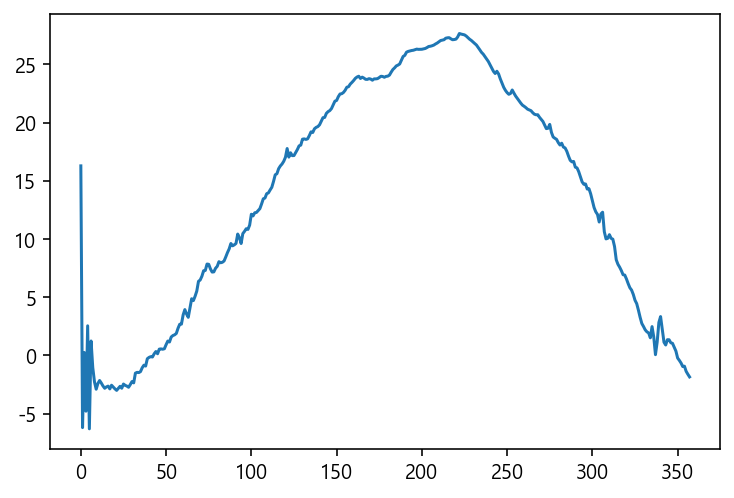

In [108]:
sub_file['평균기온'].plot()

In [109]:
sub_file.to_csv("../data/sub/038_df_LSTM_008.csv",
                index=False, encoding='utf-8')

---

In [110]:
import joblib

In [111]:
joblib.dump(model, '../model/LSTM_008.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-12-26 19:39:08         1814
metadata.json                                  2023-12-26 19:39:08           64
variables.h5                                   2023-12-26 19:39:08       170400


['../model/LSTM_008.pkl']

In [112]:
loaded_model = joblib.load('../model/LSTM_008.pkl')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-12-26 19:39:08         1814
metadata.json                                  2023-12-26 19:39:08           64
variables.h5                                   2023-12-26 19:39:08       170400
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
